# Лабораторная работа №1: Моделирование стандартных дискретных сигналов

Выполнили студенты гр. 2381 Дудкин Михаил Валерьевич и Газукина Дарья Денисовна. Вариант №3.

## Цель работы

Изучить математическое описание стандартных дискретных сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения
**Сигнал** — это зависимость одной величины от другой, несущая информацию о состоянии или поведении какой-либо системы.

**Аналоговый сигнал** — непрерывный сигнал, определенный на непрерывном множестве.

**Дискретный сигнал** — непрерывный сигнал, определенный на дискретном множетсве.

**Цифровой сигнал** — сигнал, определенный на дискретном множестве, и принимающий значения из дискретного множества.

**Дельта-функция Дирака**:

$δ(t) = \begin{cases}
    ∞, & t = 0 \\
    0, & t \neq 0 \\
  \end{cases}$

Дискретный аналог дельта-функции Дирака — **цифровой единичный импульс**:

$δ_d(k) = \begin{cases}
    1, & k = 0 \\
    0, & k \neq 0 \\
  \end{cases} \quad k \in ℕ$

**Единичная функция Хевисайда**:

$\sigma(t) = \begin{cases}
    0, & t < 0 \\
    0.5, & t = 0 \\
    1, & t > 0 \\
  \end{cases} $

Дискретный аналог единичной функции Хевисайда — **цифровой цифровой скачок**:

$\sigma_d(k) = \begin{cases}
    1, & k ≥ 0 \\
    0, & k < 0 \\
  \end{cases} \quad k \in ℕ$

**Дискретная экспоненциальная функция**:

$s_1(k) = Ae^{\alpha k}, \quad k \in ℕ$

**Дискретный комплексный гармонический сигнал**:

$s_2(k) = Ce^{j\omega_0k}, \quad k \in ℕ$








## Постановка задачи

С помощью программных средств провести моделирование и анализ стандартных дискретных последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Выполнение работы

Импорт необходимых библиотек

In [38]:
import math
import numpy as np
import matplotlib.pyplot as plt

Инициализация параметров варианта

In [39]:
# Вариант №3
Nb = 3                                      # Номер бригады
N = 30 + Nb % 5                            # Длина последовательности
T = 0.0005 * (1 + Nb % 3)                  # Период дискретизации
a = (-1)**Nb * (0.8 + 0.005 * (Nb % 20))   # Основание экспоненты
C = 1 + Nb % 5                             # Амплитуда гармонического сигнала
w0 = math.pi / (6 + Nb % 5)                # Частота гармонического сигнала
m = 5 + Nb % 5                             # Задержка
print(f'Nb = {Nb}\nN = {N}\nT = {T}\na = {a}\nC = {C}\nw0 = {w0}\nm = {m}')

Nb = 3
N = 33
T = 0.0005
a = -0.8150000000000001
C = 4
w0 = 0.3490658503988659
m = 8


Подготовим функцию для вывода графиков

In [40]:
def signal_plot(signal, title, T=1, signal2=None):
    time_labels = np.arange(len(signal)) * T  # Если пероид не указан, используется дискретное нормированное время
    plt.figure(figsize=(8, 4))
    plt.stem(time_labels, signal)
    if signal2 is not None:
      plt.stem(time_labels, signal2)
    plt.xlabel('Отсчеты')
    plt.ylabel('Уровень сигнала')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Задание 1

In [41]:
t = np.linspace(0, T * (N - 1), N)
impulse_signal = (t == 0).astype(int)

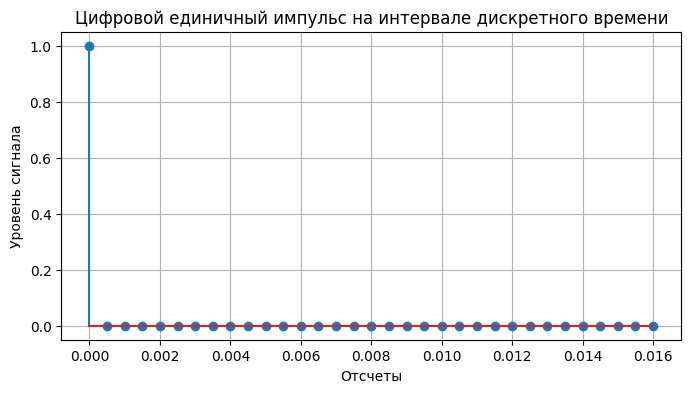

In [42]:
signal_plot(impulse_signal, "Цифровой единичный импульс на интервале дискретного времени", T)

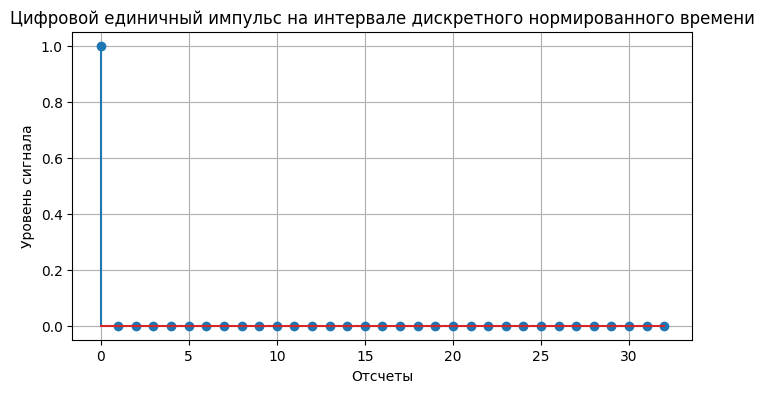

In [43]:
signal_plot(impulse_signal, "Цифровой единичный импульс на интервале дискретного нормированного времени")

Дискретное время это временная переменная, принимающая значения из дискретного множества временного интервала. Дискретное нормированное время это временная переменная, принимающая натуральные значения и показывающая, сколько периодов дискретизации прошло с момента времени $t=0$. Они связаны соотношением $t = n \cdot T$, где $T$ - период дискретизации.

Дельта-функция это обобщенная функция, определяемая на непрерывном множестве и не имеющая физической реализации. Цифровой единичный импульс это дискретный аналог дельта-функции, его определение позволяет использоватье его в моделировании реальных процессов.

# Задание 2

In [44]:
step_signal = (t >= 0).astype(int)

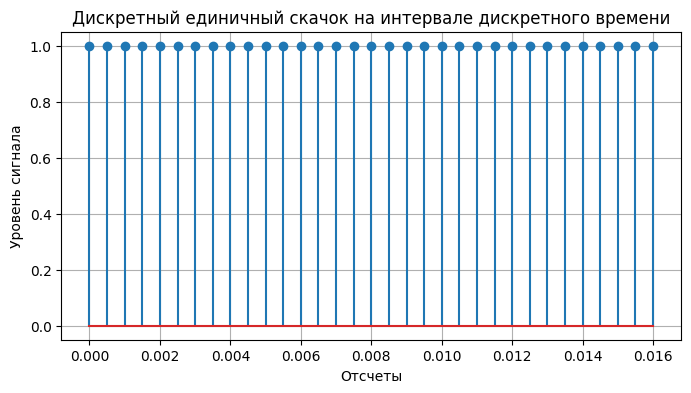

In [45]:
signal_plot(step_signal, "Дискретный единичный скачок на интервале дискретного времени", T)

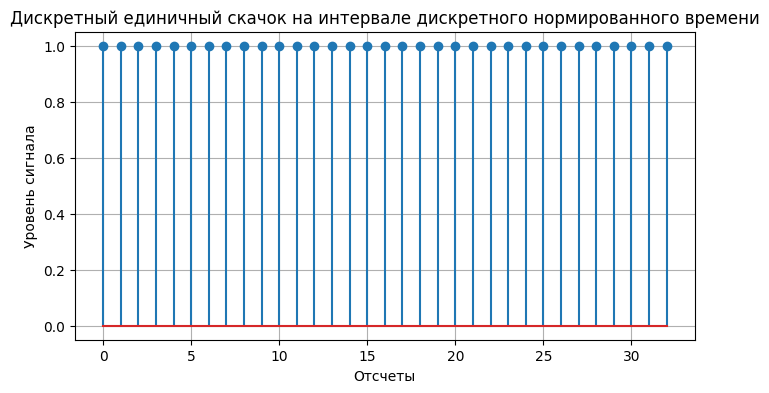

In [46]:
signal_plot(step_signal, "Дискретный единичный скачок на интервале дискретного нормированного времени")

Дискретный скачок при $t=0$ равен 1, в то время как аналоговый может быть не определен. Дискретный и аналоговый единичные скачки совпадают в тех точках, в которых определен дискретный скачок.

Дискретный единичный скачок не имеет собственной частоты дискретизации. Она может быть выбрана любой, в зависимости от периода дискретизации исследуемого процесса.

# Задание 3

In [47]:
exponential_signal = a ** (t / T)

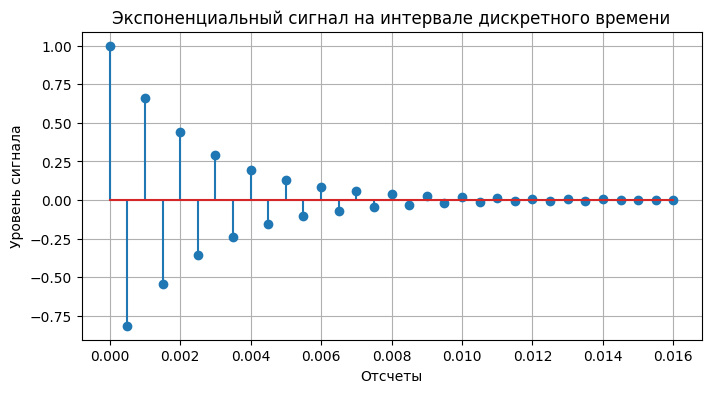

In [48]:
signal_plot(exponential_signal, "Экспоненциальный сигнал на интервале дискретного времени", T)

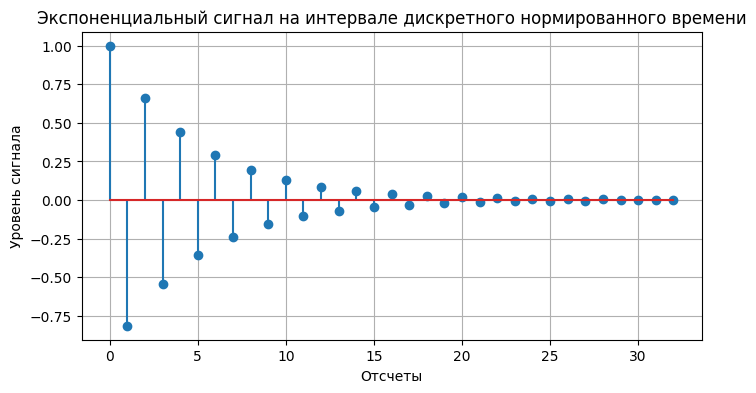

In [49]:
signal_plot(exponential_signal, "Экспоненциальный сигнал на интервале дискретного нормированного времени")

Дискретная экспонента определена на дискретном множестве и равна аналоговой экспоненте на этом множестве. Аналоговая экспонента определена на непрерывном множестве.

# Задание 4

In [50]:
complex_signal = C * np.exp(1j * w0 * t)

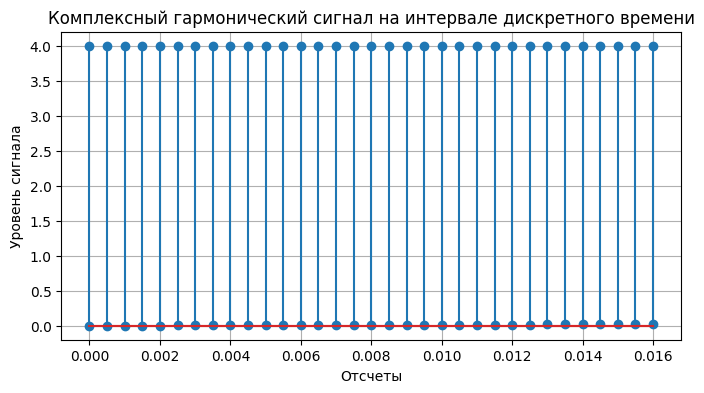

In [51]:
signal_plot(complex_signal.real, "Комплексный гармонический сигнал на интервале дискретного времени", T, complex_signal.imag)

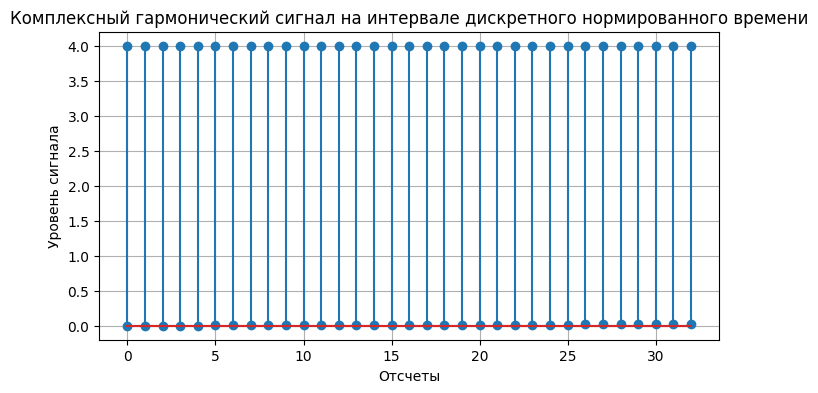

In [52]:
signal_plot(complex_signal.real, "Комплексный гармонический сигнал на интервале дискретного нормированного времени", signal2=complex_signal.imag)

$s_2(k) = Ce^{j\omega_0k} = Ccos(\omega_0k) + jCsin(\omega_0k)$

# Задание 5

In [53]:
delayed_impulse = (t == m * T).astype(int)
delayed_step = (t >= m * T).astype(int)
delayed_exp = a ** (t / T - m) * delayed_step

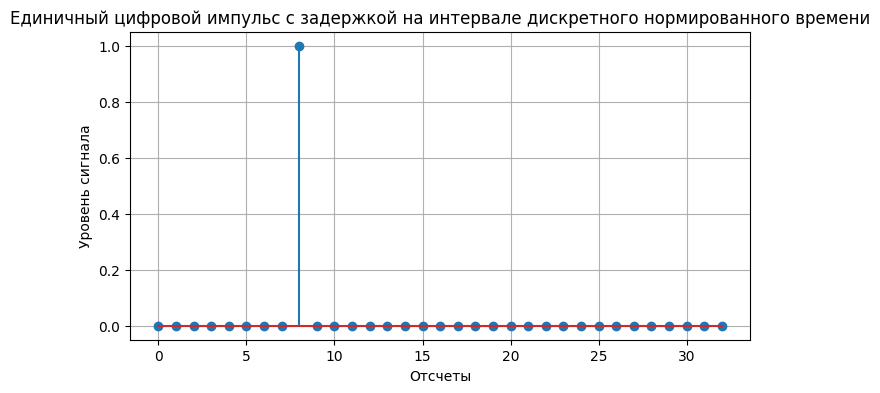

In [54]:
signal_plot(delayed_impulse, "Единичный цифровой импульс с задержкой на интервале дискретного нормированного времени")

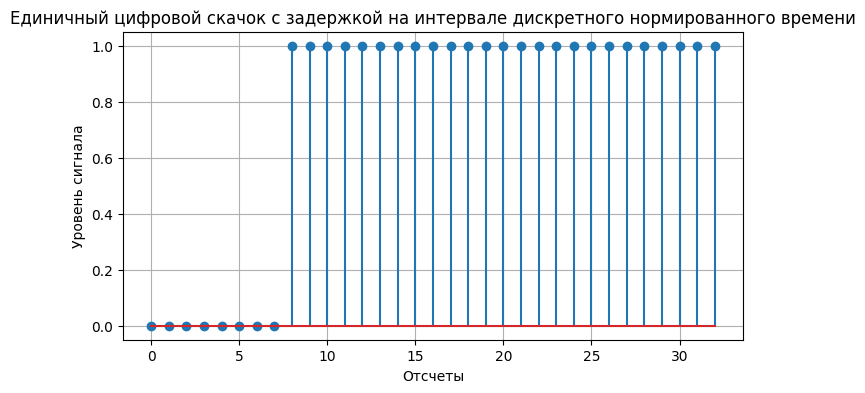

In [55]:
signal_plot(delayed_step, "Единичный цифровой скачок с задержкой на интервале дискретного нормированного времени")

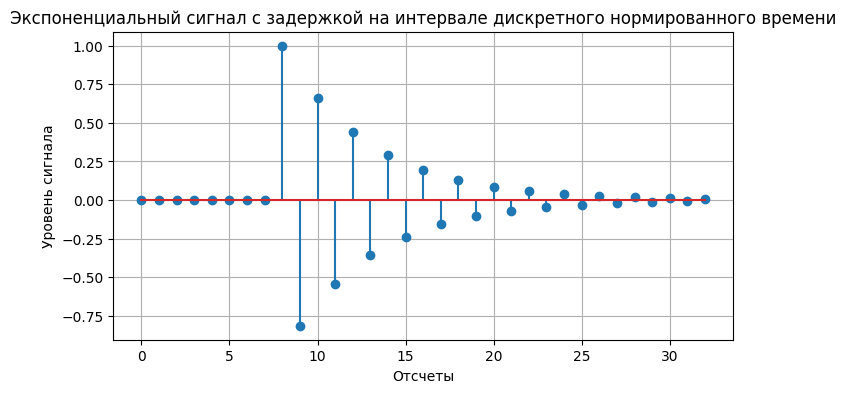

In [56]:
signal_plot(delayed_exp, "Экспоненциальный сигнал с задержкой на интервале дискретного нормированного времени")

$y_1(k) = \delta_d(k-m)$

$y_2(k) = \sigma_d(k-m)$

$y_3(k) = e^{\alpha(k-m)} \cdot \sigma_d(k-m)$

## Выводы




В данной работе были изученны математические основы и программные способы моделирования таких основных сигналов как: цифровой единичный импульс, дискретный единичный скачок, экспоненциальный сигнал, комплексный гармонический сигнал. Были выявлены сходства и различия аналоговых сигналов и их дискретных аналогов.